# Proyecto 7

## Descripción del proyecto

Estás trabajando como analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. Tu tarea es encontrar patrones en la información disponible. Quieres comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

Al trabajar con una base de datos, analizarás los datos de los competidores y probarás una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

## Objetivos:

- Importar los archivos
- Estudiar los datos que contienen
- Asegurar que los tipos de datos sean correctos
- Identificar los 10 principales barrios en términos de finalización del recorrido
- Hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones
- Sacar conclusiones basadas en cada gráfico y explicar los resultados
- Realizar prueba de hipótesis: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

## Análisis exploratorio de datos

### Importar los archivos

In [1]:
# Importación de librerías

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
# Importación de archivos

# dataframe con viajes realizados y nombres de compañías de taxis
company_trips = pd.read_csv("/datasets/project_sql_result_01.csv")

# dataframe con localizaciones donde finalizaron viajes y el promedio de esos viajes
dropoff_trips = pd.read_csv("/datasets/project_sql_result_04.csv")

# dataframe con datos meteorológicos y fechas, para la prueba de hipótesis
df_hyp = pd.read_csv("/datasets/project_sql_result_07.csv")

### Exploración y corrección de datos

In [3]:
# Información y visualización de dataframes

company_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
company_trips.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


**Comentario:**

<span style='color:green'> No hay datos ausentes en este dataframe, los tipos de datos son adecuados. </span>

In [5]:
dropoff_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [6]:
dropoff_trips.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


**Comentario:**


<span style='color:green'> No hay datos ausentes en este dataframe. </span>

<span style='color:orange'> Los tipos de datos no son adecuados en la columna 'average_trips'. </span> <span style='color:blue'> Se cambiarán a datos enteros, redondeando al entero más cercano. </span>

In [7]:
df_hyp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [8]:
df_hyp.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


**Comentario:**

<span style='color:green'> No hay datos ausentes en este dataframe. Los tipos de datos son adecuados. </span>

In [9]:
# Corrección de datos: cambio a datos 'int' en la columna 'average_trips' del dataframe dropoff_trips
# Primero redondeo los valores a su entero más cercano

dropoff_trips['average_trips'] = dropoff_trips['average_trips'].round()

dropoff_trips = dropoff_trips.astype({'average_trips': 'int32'})

dropoff_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dropoff_location_name  94 non-null     object
 1   average_trips          94 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 1.2+ KB


In [10]:
# Exploración de datos duplicados en dataframe: company_trips

company_trips.duplicated().sum()

0

In [11]:
# Exploración de datos duplicados en la columna 'company_name'

company_trips['company_name'].duplicated().sum()

0

<span style='color:green'> No hay datos totalmente duplicados en el dataframe company_trips, ni duplicados en la columna 'company_name' </span>

In [12]:
# Exploración de datos duplicados en dataframe: dropoff_trips

dropoff_trips.duplicated().sum()

0

In [13]:
# Exploración de datos duplicados en la columna 'dropoff_location_name'

dropoff_trips['dropoff_location_name'].duplicated().sum()

0

**Comentario:**


<span style='color:green'> No hay datos totalmente duplicados en el dataframe dropoff_trips, ni duplicados en la columna 'dropoff_location_name' </span>

In [14]:
# Exploración de datos duplicados en dataframe: df_hip

df_hyp.duplicated().sum()

197

In [15]:
# Exploración de datos duplicados en columna 'start_ts'

df_hyp['start_ts'].duplicated().sum()

987

**Comentario:**


<span style='color:orange'> Hay 197 datos totalmente duplicados en el dataframe df_hip, y 987 en la columna 'start_ts' </span>

<span style='color:blue'> Tiene sentido que existan duplicados, pues varios recorridos, de una sola o de diferentes compañias, pueden comenzar en la misma hora, sobretodo porque la fecha y hora de inicio están truncadas hasta hora y no minutos y segundos. </span>

### Análisis de datos

#### 10 principales barrios en términos de finalización de recorrido

In [16]:
# Del dataframe dropoff_trips, ordenaré de forma descendente y seleccionaré las primeros 10 posiciones

dropoff_trips.sort_values(by='average_trips', ascending=False)

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547
...,...,...
89,Mount Greenwood,3
90,Hegewisch,3
91,Burnside,2
92,East Side,2


In [17]:
# Selección de los 10 primeros barrios por finalización de recorrido

top_10_locations = dropoff_trips.loc[0:9]

top_10_locations

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547
5,Lake View,2421
6,Grant Park,2069
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1260


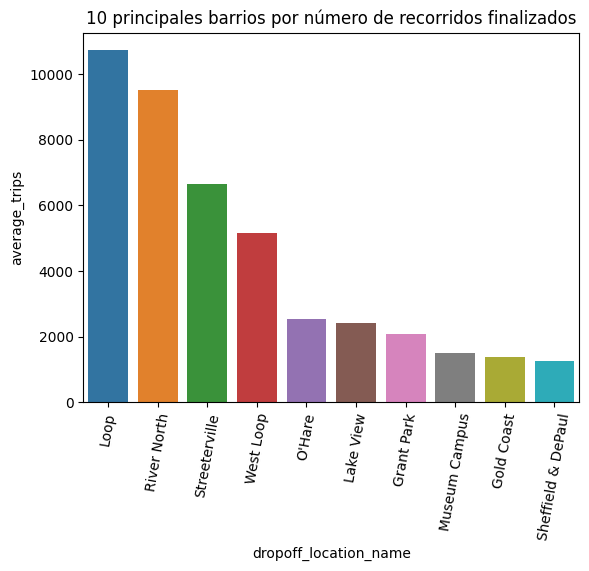

In [18]:
# Gráfico de los 10 principales barrios por número de finalizaciones

sns.barplot(data=top_10_locations, x='dropoff_location_name', y='average_trips')
plt.title('10 principales barrios por número de recorridos finalizados')
plt.xticks(rotation=80)

plt.show()

**Comentario:**

<span style='color:blue'> El barrio de destino con más viajes durante noviembre de 2017 fue Loop, con más de 10000 viajes, seguido de River North, Streeterville y West Loop. </span>

#### Gráfico de compañías de taxis vs recorridos realizados

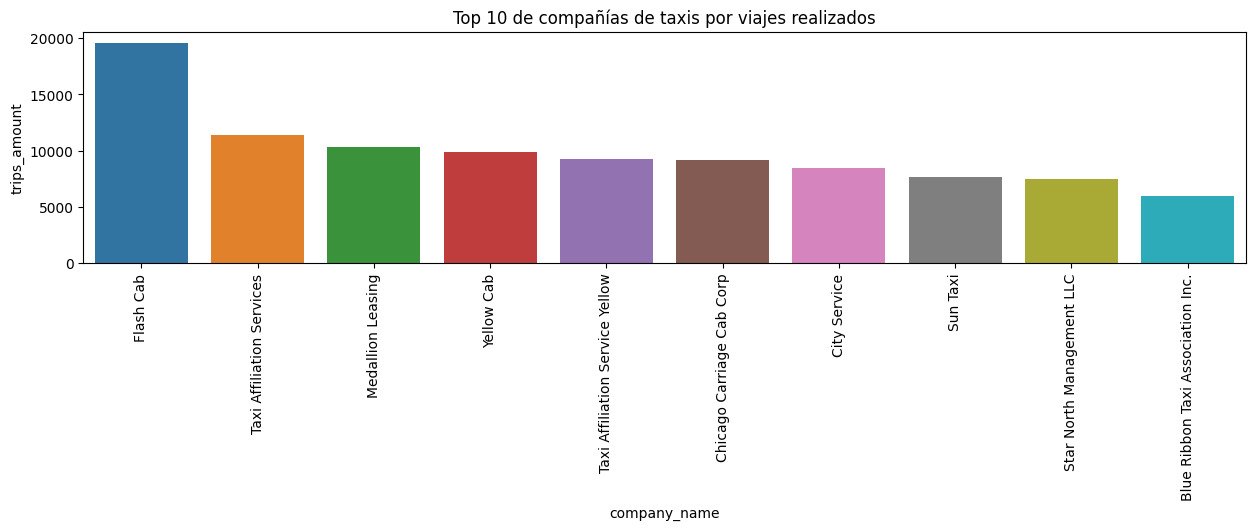

In [19]:
# Para una mejor visualización se seleccionarán las primeras 10 compañías

fig, ax = plt.subplots(figsize=(15, 3))  # ajuste del largo del gráfico

sns.barplot(data=company_trips.loc[:9], x='company_name', y='trips_amount', ax=ax)
plt.title('Top 10 de compañías de taxis por viajes realizados')
plt.xticks(rotation=90)

plt.show()

**Comentario:**

<span style='color:blue'> La compañía de taxis con más viajes realizados es Flash Cab, con cerca del doble de viajes realizados por el resto de las 9 compañías del top 10. </span>

## Prueba de hipótesis: 

### "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos"

1. Para comprobar esta hipótesis, dividire el dataframe df_hyp en dos, de acuerdo a la categoría Good (sin lluvia) y Bad (con lluvia). 
2. Realizaré una prueba de hipótesis para la igualdad de la media de dos poblaciones independientes, aunque partimos de la misma población, no se especifica que se realizaran la misma cantidad de viajes en cada una de las condiciones meteorológicas.

In [20]:
# División del df en dos: uno para buen clima (good_weather) y uno para clima lluvioso (rain)
# Extraigo solo la columna con la duración de los viajes

good_weather = df_hyp.query('weather_conditions == "Good"')['duration_seconds']

good_weather

0       2410.0
1       1920.0
2       1543.0
3       2512.0
4       1440.0
         ...  
1062    1500.0
1063       0.0
1064    1318.0
1065    2100.0
1066    1380.0
Name: duration_seconds, Length: 888, dtype: float64

In [21]:
rain = df_hyp.query('weather_conditions == "Bad"')['duration_seconds']

rain

6       2969.0
30      1980.0
34      2460.0
51      2760.0
52      2460.0
         ...  
1031    2560.0
1032    1908.0
1053    2400.0
1061    2186.0
1067    2834.0
Name: duration_seconds, Length: 180, dtype: float64

**Comentario:**

<span style='color:blue'> El tamaño de los dataframe no es el mismo, por lo tanto, se confirma que no se realizaron los mismos viajes en cada condición meteorológica y por lo tanto son muestras independientes. </span> 

In [22]:
# Cálculo de las varianzas

print('good_weather:', np.var(good_weather))

print('rain:', np.var(rain))

good_weather: 575732.9308497686
rain: 517403.56330246915


**Comentario:**

<span style='color:blue'> Las varianzas se ven cercanas, podrías considerarse iguales para la prueba de hipótesis. De cualquier manera, realizaré una prueba de Levene para probarlo. </span> 

In [23]:
# Prueba de Levene

# H0: las varianzas son iguales
# H1: las varianzas son diferentes

alpha = 0.05

results = st.levene(good_weather, rain)

print('valor p:', results.pvalue)

if results.pvalue > alpha:
    print('No podemos rechazar la hipótesis nula: las varianzas son iguales')
else:
    print('Se rechaza la hipótesis nula: las varianzas son diferentes')

valor p: 0.5332038671974493
No podemos rechazar la hipótesis nula: las varianzas son iguales


In [24]:
# Prueba de hipótesis para la igualdad de medias de dos poblaciones independientes

# H0: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos
# H1: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare sí cambia los sábados lluviosos

alpha = 0.05

results = st.ttest_ind(good_weather, rain)  # equal_var predeterminado (True)

print('valor p:', results.pvalue)

if results.pvalue > alpha:
    print("No podemos rechazar la hipótesis nula. La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos")
else:
    print("Se rechaza la hipótesis nula. La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare sí cambia los sábados lluviosos")

valor p: 6.517970327099473e-12
Se rechaza la hipótesis nula. La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare sí cambia los sábados lluviosos


**Comentario:**

<span style='color:blue'> La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare sí cambia los sábados lluviosos 
</span>

## Conclusiones

<span style='color:blue'> 

- En noviembre de 2017, el barrio con mayores viajes finalizados fue Loop, el distrito central de negocios de Chicago.
    
- La compañia con mayores viajes realizados, entre el 15 y 16 de noviembre de 2017, fue Flash Cab, con cerca del doble de viajes realizados que las compañias en 2o y 3er lugar del ranking.
  
- Los sábados lluviosos, la duración promedio de los viajes desde Loop hasta el Aeropuerto Internacional O'Hare sí cambia.

</span>